# Prediction of survival on the Titanic

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## 1. Importing libraries & Files

In [4267]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 2. Checking the structure of datasets

In [4268]:
df_train = pd.read_csv('train.csv')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4269]:
df_test = pd.read_csv('test.csv')

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4270]:
df_train.shape

(891, 12)

In [4271]:
df_test.shape

(418, 11)

##### Performing analysis on combined `df_train` & `df_test` as `df`

In [4272]:
df = pd.concat([df_train, df_test])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.1 Data Types

In [4273]:
# Determining the shape of the datset

df.shape

(1309, 12)

In [4274]:
# Checking the column-wise info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [4275]:
# Checking the summary for the numeric columns 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [4276]:
# Checking the null values

df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

#### 2.2.1 Missing values of Numeric column 'Age'

In [4277]:
df.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

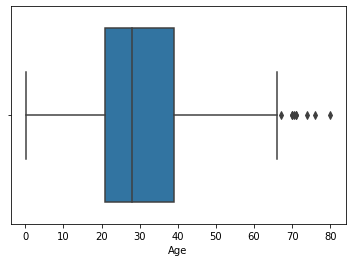

In [4278]:
sns.boxplot(df.Age)
plt.show()

##### This column is have outliers which is very large it will be inappropriate to fill those missing values with mean, we will fill those missing banks with median value.

In [4279]:
# Median value for Age column.

median_age = df.Age.median()
median_age

28.0

In [4280]:
# Filling missing values with median value.

df.Age.fillna(median_age, inplace = True)

In [4281]:
# Checking null values from column 'Age'

df.Age.isnull().sum()

0

#### 2.2.2 Missing values of Categorical column 'Embarked'

In [4282]:
df.Embarked.isnull().sum()

2

In [4283]:
# Checking normalize value counts for NAME_TYPE_SUITE column

df.Embarked.value_counts(normalize = True)

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

In [4284]:
# Missing values in Categorical column 'Embarked' should be replaced with the mode value.

mode_Embarked = df.Embarked.mode()[0]
mode_Embarked

'S'

In [4285]:
# Filling missing values with mode value.

df['Embarked'].fillna(mode_Embarked, inplace = True)

In [4286]:
# Checking null values from column 'Embarked'

df.Embarked.isnull().sum()

0

#### 2.2.3 Missing values of Categorical column 'Cabin'

In [4287]:
# # Checking the null values 
df.Cabin.isnull().sum()

1014

In [4288]:
# # Checking the null values percentages
100*(df.Cabin.isnull().sum()/len(df))

77.46371275783041

We have 77.4% missing values in dataset, imputing with any value will create unrelaible output. So creating a `missing` value to address missing values.

In [4289]:
df['Cabin'].replace([None], ['missing'], inplace = True)

In [4290]:
# Checking the null values 
df.Cabin.isnull().sum()

0

In [4291]:
# Checking missing values in df_train again

df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         0
dtype: int64

#### 2.2.4 Missing values of Numeric column 'Fare'

In [4292]:
df.Fare.isnull().sum()

1

In [4293]:
# Fare is correlated to Pclass imputing value related Pclass= 3

df["Fare"] = df["Fare"].fillna(np.mean(df[((df["Pclass"]==3))]["Fare"]))

In [4294]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

##### Missing values from Survived column are from df_test dataset only

## 3. Feature analysis

#### 3.1  We are comparing `Survived` people with Categorical variables as "Sex, Pclass, Embarked, SibSp, Parch

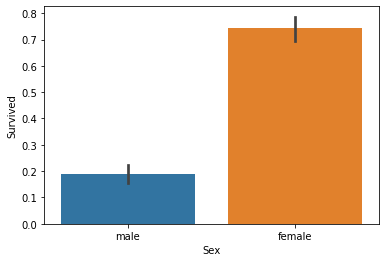

In [4295]:
# Sex- Survived

sns.barplot(x= 'Sex', y= 'Survived', data = df)
plt.show()

In [4296]:
df[['Sex','Survived']].groupby(['Sex'], as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


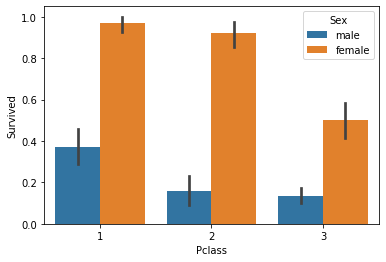

In [4297]:
# Pclass - Survived

sns.barplot(x= 'Pclass', y= 'Survived',hue = 'Sex', data = df)
plt.show()

In [4298]:
df[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


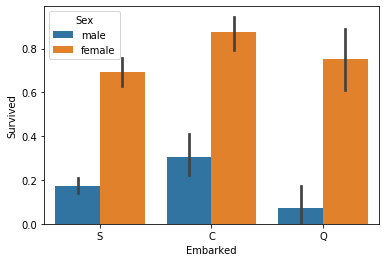

In [4299]:
# Embarked - Survived

sns.barplot(x= 'Embarked', y= 'Survived',hue = 'Sex', data = df)
plt.show()

In [4300]:
df[['Embarked','Survived']].groupby(['Embarked'], as_index = False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


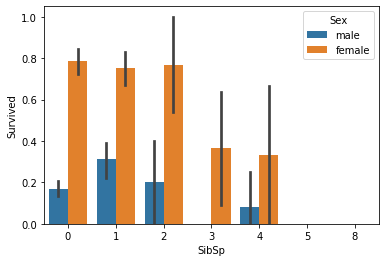

In [4301]:
# SibSp - Survived

sns.barplot(x= 'SibSp', y= 'Survived',hue = 'Sex', data = df)
plt.show()

In [4302]:
df[['SibSp','Survived']].groupby(['SibSp'], as_index = False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


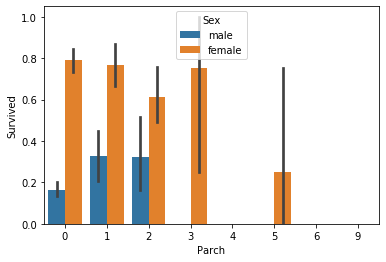

In [4303]:
# Parch - Survived

sns.barplot(x= 'Parch', y= 'Survived',hue = 'Sex', data = df)
plt.show()

In [4304]:
df[['Parch','Survived']].groupby(['Parch'], as_index = False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000
7,9,NaN


#### 3.2 Now We are comparing `Survived` people with Continuous variables as 'Age, Fare'

- Survived Vs. Age

In [4305]:
# Groupby the Survived to find the mean of the Age with Survived as 0-no & 1-Yes

df.groupby('Survived')['Age'].mean()

Survived
0.0    30.028233
1.0    28.291433
Name: Age, dtype: float64

In [4306]:
# Groupby the Survived to find the median of the Age with Survived as 0-no & 1-Yes

df.groupby('Survived')['Age'].median()

Survived
0.0    28.0
1.0    28.0
Name: Age, dtype: float64

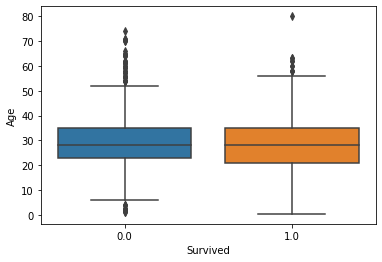

In [4307]:
# Plotting box plot between Survived & Age

sns.boxplot(data = df, x = 'Survived', y= 'Age')
plt.show()

- Survived Vs. Fare

In [4308]:
# Groupby the Survived to find the mean of the fare with Survived as 0-no & 1-Yes

df.groupby('Survived')['Fare'].mean()

Survived
0.0    22.117887
1.0    48.395408
Name: Fare, dtype: float64

In [4309]:
# Groupby the Survived to find the median of the Fare with Survived as 0-no & 1-Yes

df.groupby('Survived')['Fare'].median()

Survived
0.0    10.5
1.0    26.0
Name: Fare, dtype: float64

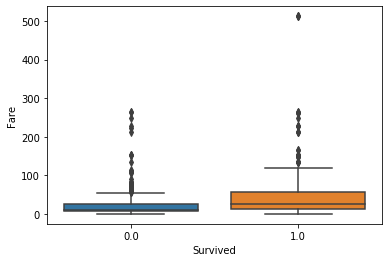

In [4310]:
# Plotting box plot between Survived & Age

sns.boxplot(data = df, x = 'Survived', y= 'Fare')
plt.show()

#### 3.3 Converting categorical variables to numerical variables

In [4311]:
# Converting male as 0 & female as 1

df['Sex'].replace(('male','female'),[0,1], inplace= True)

In [4312]:
# Converting 'S' as 0 , 'C' as '1' & 'Q' as 3 for 'Embarked' column

df['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace= True)

In [4313]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,missing,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,missing,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,missing,0


#### 3.4 Correlation between Features

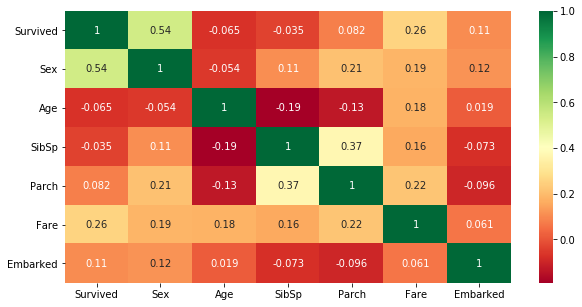

In [4314]:
# Heatmap
plt.figure(figsize= (10,5))
sns.heatmap(df[['Survived','Sex', 'Age','SibSp','Parch','Fare', 'Embarked']].corr(),
            cmap = 'RdYlGn', annot = True)
plt.show()

Inferences:
- Sex is having high association with Survived.
- Pclass, Fare & Embarked are also poisitively associated with Survived.

## 4. Feature Engineering

Updating & Correcting features
1. Age
2. Cabin
3. Family = SibSp + Parch
4. Name
5. Fare

#### 4.1 Survived Vs. Age 

In [4315]:
# Binning Age Feature to convert it into multilevel Categorical variable

df['Age_Group'] = pd.cut(df.Age, [0,20,30,40,50,60,999], 
                               labels = ['<20','20-30','30-40','40-50','50-60','60+'])

In [4316]:
df.Age_Group.value_counts()

20-30    624
<20      248
30-40    210
40-50    132
50-60     62
60+       33
Name: Age_Group, dtype: int64

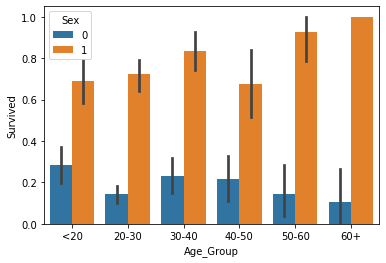

In [4317]:
#plotting the bar graph of Age_Group with Survived value.

sns.barplot(x= 'Age_Group', y = 'Survived',hue = 'Sex', data = df)
plt.show()

In [4318]:
df[['Age_Group','Survived']].groupby(['Age_Group'], as_index = False).mean()

,Age_Group,Survived
0,<20,0.458101
1,20-30,0.334152
2,30-40,0.445161
3,40-50,0.383721
4,50-60,0.404762
5,60+,0.227273


We have Age groups 40-50, 50-60 and 60+ almost equal, so keeping similar in each group.

- <20 as 0
- 20-30 as 1
- 30-40 as 2
- 40-50, 50-60, 60+ as 3 


In [4319]:
df['Age_Group'] = df['Age_Group'].replace(['<20','20-30','30-40','40-50','50-60','60+'],
                          [0,1,2,3,3,3])

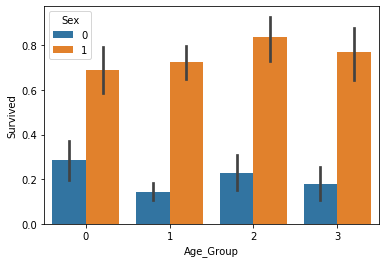

In [4320]:
#plotting the bar graph of Age_Group with Survived value.

sns.barplot(x= 'Age_Group', y = 'Survived',hue = 'Sex', data = df)
plt.show()

#### 4.2 Survived Vs. Cabin

In [4321]:
df['Cabin'] = df['Cabin'].str.extract(r'(?P<letter>[A-Za-z])(?P<digit>\d)')

In [4322]:
df['Cabin'].replace([None], ['missing'], inplace = True)

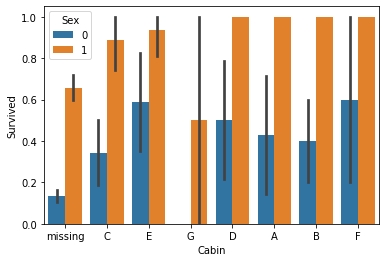

In [4323]:
sns.barplot(x= 'Cabin', y='Survived',hue = 'Sex', data = df)
plt.show()

Here, we have 8 categorical groups. We will keep similar count in each group,

- missing, G as 0
- A as 1
- C as 2 
- E, D,B,F as 3

In [4324]:
df_train['Cabin'].replace(['missing', 'G','A','C','E','D','B','F'],
                          [0,0,1,2,3,3,3,3],inplace = True)

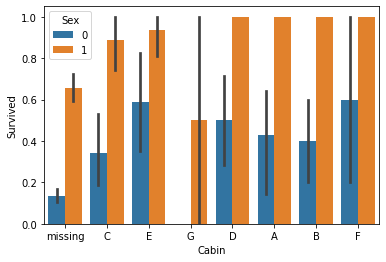

In [4325]:
sns.barplot(x= 'Cabin', y='Survived',hue = 'Sex', data = df)
plt.show()

#### 4.3 Survived Vs. Family

In [4326]:
# Family is combination or addition of column 'SibSp' & 'Parch'

df['family'] = df['SibSp'] + df['Parch']

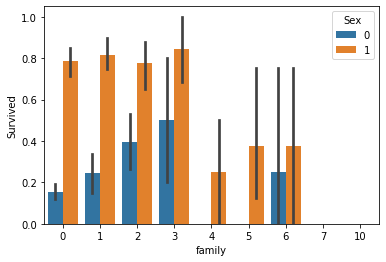

In [4327]:
sns.barplot(x = 'family', y= 'Survived',hue = 'Sex', data = df)
plt.show()

#### 4.4 Survived Vs. Title

In [4328]:
# We will extract title from Name column

df['Title'] = df.Name.str.extract('([A-Za-z]+)\.')

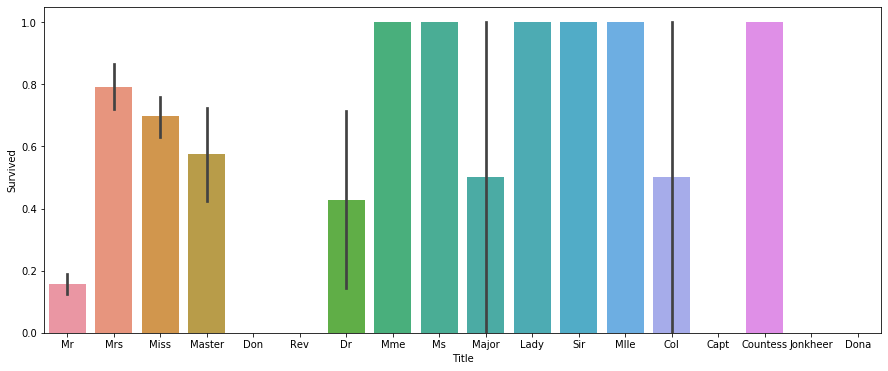

In [4329]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Title', y='Survived', data = df)
plt.show()

Here, we will keep consider `Mr. , Mrs, Miss, master, other` as others can be referenced with these.

In [4330]:
df['Title'].replace(['Mme','Ms','Mlle','Lady','Countess','Dona',
                       'Dr','Major','Sir','Capt','Don','Rev','Col', 
                       'Jonkheer'],['Miss','Miss','Miss','Mrs','Mrs','Mrs','Mr','Mr',
                                    'Mr','Mr','Mr','Other','Other','Other'], inplace=True)

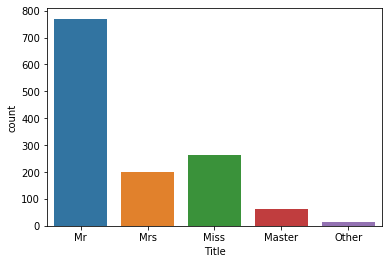

In [4331]:
sns.countplot(df['Title'])
plt.show()

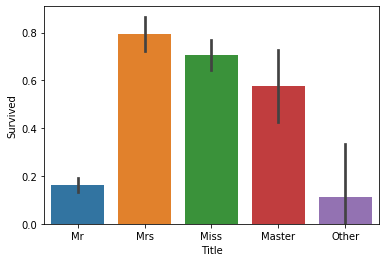

In [4332]:
sns.barplot(x = 'Title', y='Survived', data = df)
plt.show()

We will keep similar count in each group,
- Mr, other as 0
- Mrs, Miss as 1
- Master as 2

In [4333]:
# Converting categorical variable Title into numerical variable
df['Title'].replace(['Mr', 'Mrs', 'Miss', 'Master','Other'],[0,1,1,2,0], inplace =True)

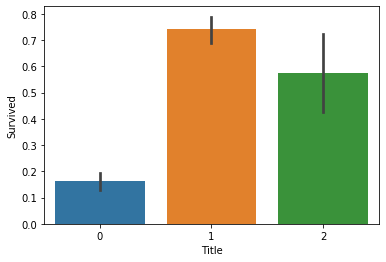

In [4334]:
sns.barplot(x = 'Title', y='Survived', data = df)
plt.show()

#### 4.5 Survived Vs. Fare

In [4335]:
# Binning Age Feature to convert it into multilevel Categorical variable

df['Fare_limit'] = pd.cut(df.Fare, [0,5,7,10,20,30,40,50,100,999], 
           labels = ['<5','5-7','7-10','10-20','20-30','30-40','40-50','50-100','100+'])

In [4336]:
df.Fare_limit.value_counts()

7-10      454
10-20     262
20-30     213
50-100    156
100+       84
30-40      79
40-50      24
5-7        17
<5          3
Name: Fare_limit, dtype: int64

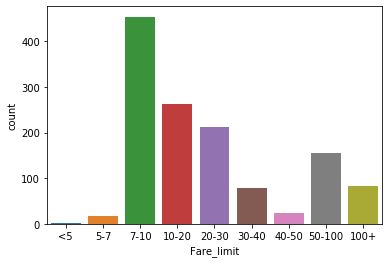

In [4337]:
sns.countplot(df['Fare_limit'])
plt.show()

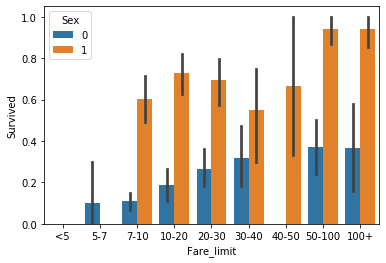

In [4338]:
sns.barplot(x = 'Fare_limit', y= 'Survived',hue = 'Sex', data = df)
plt.show()

We will keep similar count in each group,

- <5, 5-7,7-10 as 0
- 10-20, 20-30 as 1
- 30-40,40-50 as 2
- 50-100, 100+ as 3

In [4339]:
# Converting categorical variable Fare into numerical variable

df['Fare_limit'] = df['Fare_limit'].replace(['<5','5-7','7-10','10-20',
                                                         '20-30','30-40','40-50',
                                                         '50-100','100+'],[0,0,0,1,1,2,2,3,3])

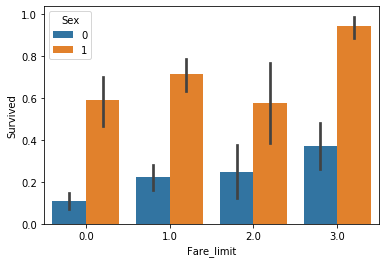

In [4340]:
sns.barplot(x = 'Fare_limit', y= 'Survived',hue = 'Sex', data = df)
plt.show()

In [4341]:
df['Fare_limit'] = df['Fare_limit'].fillna(0).astype(int)

#### 4.6 Correlation matrix

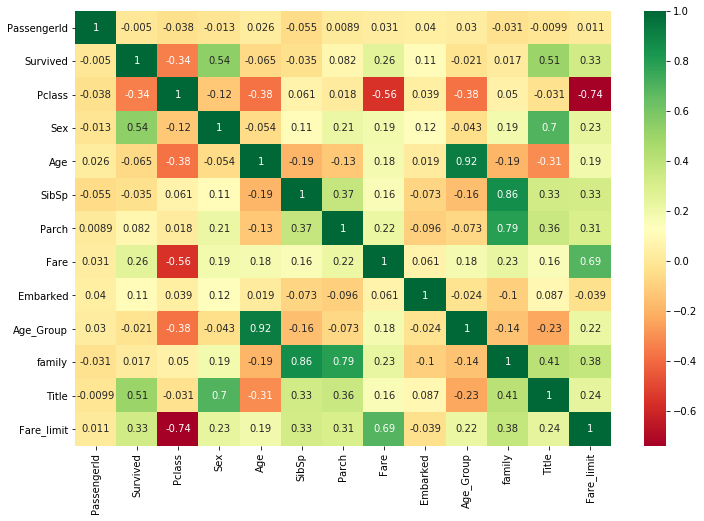

In [4342]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap = 'RdYlGn',annot = True)
plt.show()


Inferences:

- We have high correlation between Age and Age_Group. So Dropping column 'Age'.
- High correlation between Family with SibSp & Parch. So Dropping columns 'SibSp' & 'Parch'.
- We have derived feature Title for 'Name' Column, so Dropping column 'Name'.
- We have high correlation between 'Fare_limit' with 'Fare' & 'Cabin'.So Dropping 'Fare' & 'Cabin'.

In [4343]:
# Dropping Features

df.drop(labels = ['Age','SibSp','Parch','Name','Fare','Cabin','Ticket','PassengerId'],
             axis = 1, inplace = True)

In [4344]:
df.head()

,Survived,Pclass,Sex,Embarked,Age_Group,family,Title,Fare_limit
0,0.0,3,0,0,1,1,0,0
1,1.0,1,1,1,2,1,1,3
2,1.0,3,1,0,1,0,1,0
3,1.0,1,1,0,2,1,1,3
4,0.0,3,0,0,2,0,0,0


### 5. One Hot Encoding

In [4345]:
df = pd.get_dummies(df, columns = ['Pclass','Embarked','Age_Group',
                                               'family','Title','Fare_limit'])

In [4346]:
df.head()

,Survived,Sex,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,Age_Group_0,Age_Group_1,Age_Group_2,Age_Group_3,family_0,family_1,family_2,family_3,family_4,family_5,family_6,family_7,family_10,Title_0,Title_1,Title_2,Fare_limit_0,Fare_limit_1,Fare_limit_2,Fare_limit_3
0,0.0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,1.0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1.0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,1.0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0.0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


### 6. Classification Method:

#### 7.1 Train-Test Split

In [4347]:
if len(df) == (len(df_train) + len(df_test)):
    print('Success')
else:
    print('No')

Success


In [4348]:
from sklearn.model_selection import train_test_split

In [4349]:
train = df[:len(df_train)]
test = df[len(df_train):]
test.drop(labels='Survived', axis = 1, inplace = True)

In [4350]:
X_train = train.drop(labels = "Survived", axis=1)
y_train = train["Survived"]

In [4351]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.7, test_size=0.3, random_state=42)

#### 7.2 Modelling

##### Logistic Regression

In [4352]:
from sklearn.linear_model import LogisticRegression

In [4353]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
print("Accuracy: ", log_reg.score(X_test,y_test))

Accuracy:  0.8171641791044776


##### Random Forest Regression

In [4354]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [4355]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
print("Accuracy: ", rf_model.score(X_train,y_train))

Accuracy:  0.884430176565008


In [4356]:
print("Accuracy: ", rf_model.score(X_test,y_test))

Accuracy:  0.7947761194029851


In [4357]:
#score

from sklearn.metrics import roc_auc_score

y_pred = rf_model.predict(X_test)
roc_auc_score(y_pred, y_test)

0.7928571428571429

##### Ensemble modeling

In [4358]:
voting_classfication = VotingClassifier(estimators = [('lg', log_reg), ('rfg', rf_model)], voting="hard", n_jobs=-1)
voting_classfication.fit(X_train, y_train)
print("Accuracy: ", voting_classfication.score(X_test,y_test))

Accuracy:  0.8097014925373134


##### Output File

In [4359]:
test_result = pd.Series(voting_classfication.predict(test), name = "Survived").astype(int)
results = pd.concat([df_test["PassengerId"], test_result],axis = 1)
results.to_csv("Pred_titanic.csv", index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
